In [118]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
#https://stackoverrun.com/fr/q/12917049

import seaborn as sns
import os
from dataclasses import dataclass
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from typing import *

df = pd.read_table("../mapping_stat.tsv")
columns = df.columns

#['sample', 'sample_unit', 'read', 
#                 'Number of input reads', 'Average input read length',
#                 'Uniquely mapped reads number', 'Uniquely mapped reads %',
#                 'Average mapped length', 'Number of splices: Total',
#                 'Number of splices: Annotated (sjdb)', 'Number of splices: GT/AG',
#                 'Number of splices: GC/AG', 'Number of splices: AT/AC',
#                 'Number of splices: Non-canonical', 'Mismatch rate per base, %',
#                 'Deletion rate per base', 'Deletion average length',
#                 'Insertion rate per base', 'Insertion average length',
#                 'Number of reads mapped to multiple loci',
#                 '% of reads mapped to multiple loci',
#                 'Number of reads mapped to too many loci',
#                 '% of reads mapped to too many loci',
#                 '% of reads unmapped: too many mismatches',
#                 '% of reads unmapped: too short', '% of reads unmapped: other',
#                 'Number of chimeric reads', '% of chimeric reads']

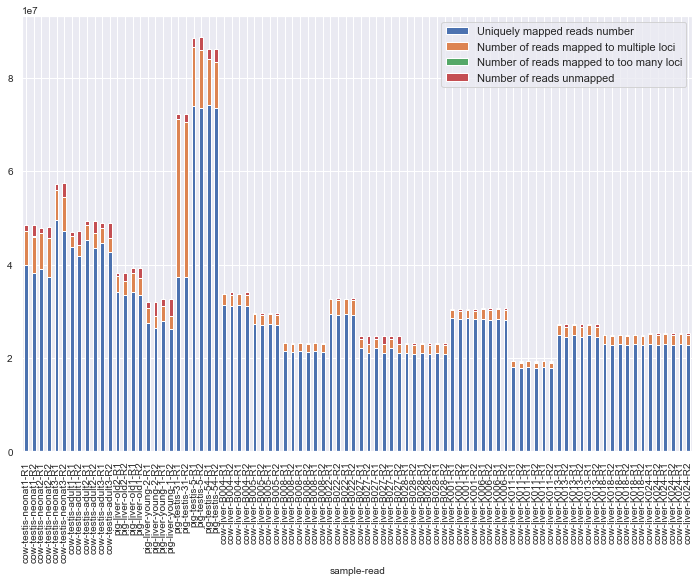

In [121]:
# Number of reads:
columns_df1 = ['sample', 'sample_unit', 'read', 'Number of input reads', 'Uniquely mapped reads number', 
               'Number of reads mapped to multiple loci', 'Number of reads mapped to too many loci',
               'Number of chimeric reads']

df1 = pd.DataFrame(df, columns=columns_df1)

df1["Number of reads unmapped"] = (df1['Number of input reads'] - 
                                  (df1['Uniquely mapped reads number'] +  
                                   df1['Number of reads mapped to multiple loci'] + 
                                   df1['Number of chimeric reads']))  

sample = df1["sample"].to_list()
read = df1["read"].to_list()
sample_read_names = [i + "-" + j for i, j in zip(sample, read)] 

df1["sample-read"] = sample_read_names

columns_clean = ['sample', 'sample_unit', 'read', 'sample-read', 'Uniquely mapped reads number', 
                 'Number of reads mapped to multiple loci', 'Number of reads mapped to too many loci',
                 'Number of reads unmapped']

df_clean = pd.DataFrame(df1, columns=columns_clean)

df_clean.plot.bar(x='sample-read', stacked=True);

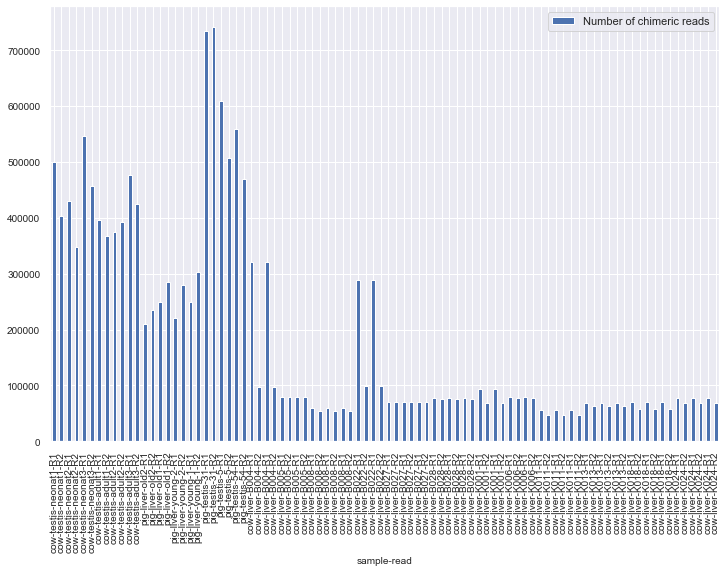

In [125]:
# Number of chimeric reads:
columns_df2 = ['sample', 'sample_unit', 'read', 'sample-read', 'Number of chimeric reads']
df2 = pd.DataFrame(df1, columns=columns_df2)

df2.plot.bar(x='sample-read', stacked=True);

In [ ]:
# Number of annotated / non-canonical junction splices:


